# Customer Profiling

**Exexrcise 4.10**

Step 1

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Data

In [2]:
# Assigning the path

path = r'C:\Users\guest23455\Desktop\CareerFoundry\Data Immersion\Achievement 4_Python Fundamentals for Data Analysts\05-2023 Instacart Basket Analysis'

In [3]:
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_data.pkl'))

In [4]:
df_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,spent_flag,median_days,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


Step 2

In [5]:
df_combined.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', ' price_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spent_flag', 'median_days', 'frequency_flag', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'marital_status', 'income'],
      dtype='object')

No PII information is included in the data

Step 3 - Regional Segmentation

In [6]:
# Create an empty list called region 

region = []

In [7]:
# Fill the region list 
# Group the sates according to regions : Northeast, Midwest, South, West

for value in df_combined['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else :
        region.append('West')

In [8]:
# Adding region to the df

df_combined['region'] = region

In [9]:
# Check value counts

df_combined['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [10]:
df_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,median_days,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South


Difference in spending habits between different US regions

In [11]:
# Explore the spending patterns across different regions
# Create a crosstab between region and spent_flag

crosstab_spending_region = pd.crosstab(df_combined['region'], df_combined['spent_flag'], dropna = False)

In [12]:
# Display the crosstab

crosstab_spending_region

spent_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


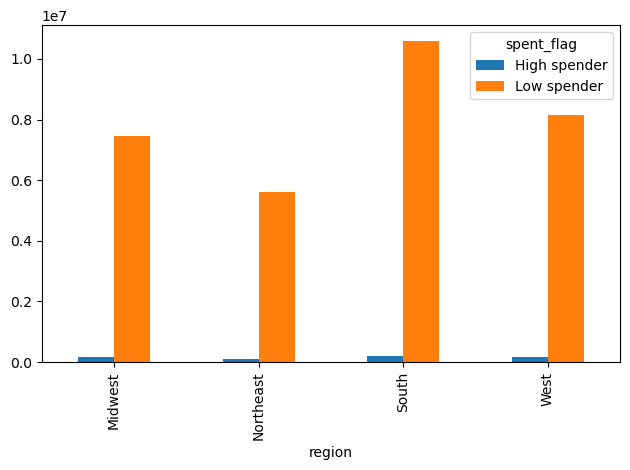

In [146]:
# Create a stacked bar chart to visualize the spending patterns across the regions

bar_spending_region = crosstab_spending_region.plot.bar()
plt.tight_layout()

In [147]:
# Save the visualization as png

bar_spending_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spending_region.png'))

Step 4

In [15]:
# Creating an exclusion flag for low activity customers

# Customers with orders less than 5 are 'low-activity customer'

df_combined.loc[df_combined['max_order'] < 5, 'order_flag'] = 'Low-activity customer'

In [16]:
# Customers with orders more than/equal to 5 are 'high-activity customer'

df_combined.loc[df_combined['max_order'] >= 5, 'order_flag'] = 'High-activity customer'

In [17]:
df_combined['order_flag'].value_counts(dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: order_flag, dtype: int64

In [18]:
# Create a sample with only High-activity customers

high_activity_customers = df_combined[df_combined['order_flag'] == 'High-activity customer']

In [19]:
# Verify the number of rows

high_activity_customers.shape

(30964564, 34)

In [20]:
# Export the sample

high_activity_customers.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_customers.pkl'))

Step 5

**Age Profile**

In [21]:
# Creating an age profile

df_combined.loc[df_combined['age'] <= 40, 'age_profile'] = 'Young'

In [22]:
df_combined.loc[((df_combined['age'] > 40) & (df_combined['age'] < 65)), 'age_profile'] = 'Middle-aged'

In [23]:
df_combined.loc[df_combined['age'] >= 65, 'age_profile'] = 'Senior'

In [24]:
# Check the value counts

df_combined['age_profile'].value_counts(dropna = False)

Middle-aged    12159729
Young          11670046
Senior          8575084
Name: age_profile, dtype: int64

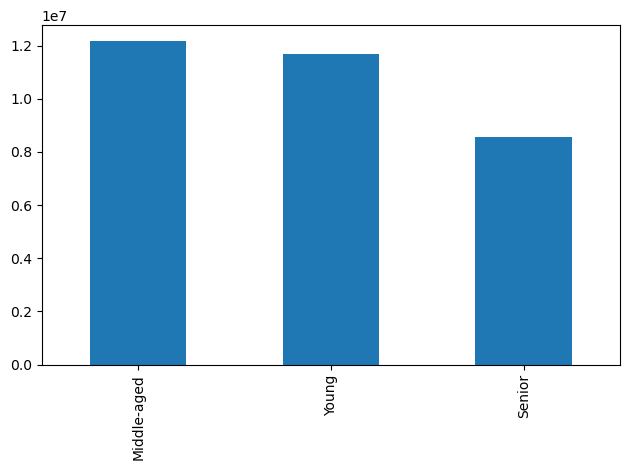

In [148]:
# Create a bar chart to visualize the age profile

bar_age_profile = df_combined['age_profile'].value_counts().plot.bar()
plt.tight_layout()

In [149]:
# Save the visualization as png

bar_age_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile.png'))

**Income Profile**

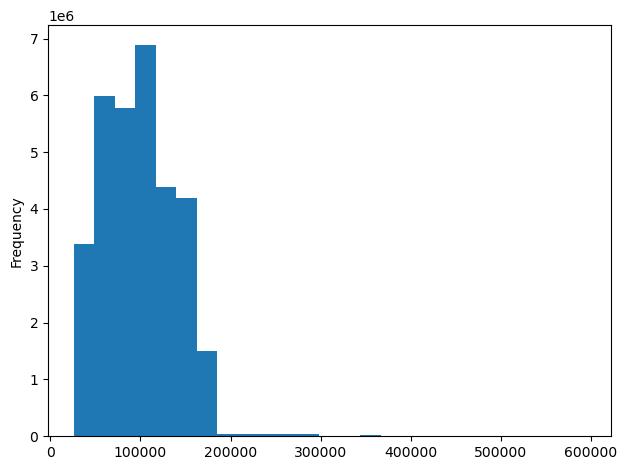

In [150]:
# Let us explore the income distribution 

hist_income = df_combined['income'].plot.hist(bins = 25)
plt.tight_layout()

In [151]:
# Save the visualization as png

hist_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_income.png'))

In [29]:
# Creating an income profile

df_combined.loc[df_combined['income'] < 75000, 'income_profile'] = 'Low income'

In [30]:
df_combined.loc[(df_combined['income'] >= 75000) & (df_combined['income'] < 125000), 'income_profile'] = 'Mid income'

In [31]:
df_combined.loc[df_combined['income'] >= 125000, 'income_profile'] = 'High income'

In [32]:
# Check value counts

df_combined['income_profile'].value_counts(dropna = False)

Mid income     13331136
Low income     10442766
High income     8630957
Name: income_profile, dtype: int64

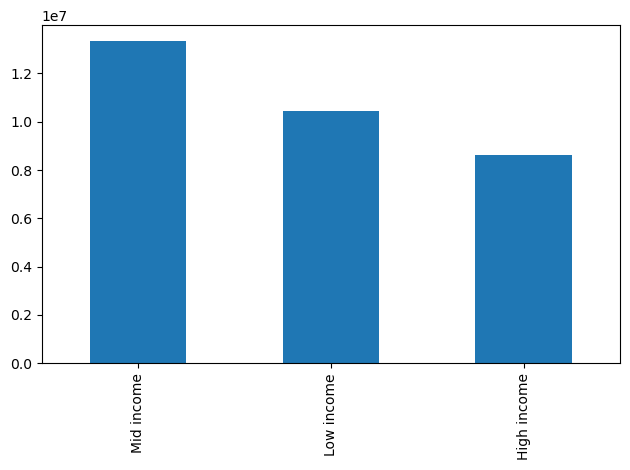

In [152]:
# Create a bar chart to visualize the income profile

bar_income_profile = df_combined['income_profile'].value_counts().plot.bar()
plt.tight_layout()

In [153]:
# Save the visualization as png

bar_income_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile.png'))

**Diet Profile**

In [35]:
# Creating a diet profile 
# Vegetarian diet excludes meat (all departments except 12)
# Vegan diet excludes meat and dairy products (all departments except 12 and 16)
# The rest follow Non-vegetarian diet

# Create a diet crosstab

department_user_crosstab = pd.crosstab(df_combined['department_id'], df_combined['user_id'], dropna = False)


In [36]:
# Assigning diet flags and storing them in a dictionary

diet_dict = dict()
for user in department_user_crosstab:
    diet_list = department_user_crosstab[user].tolist()
    if diet_list[11] == 0 and diet_list[15] == 0:
        diet_dict[user] = 'Vegan'
    elif diet_list[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Non-vegetarian'

In [37]:
# Assigning the flags to the list

diet_flag = []
for user in df_combined['user_id']:
    diet_flag.append(diet_dict[user])

In [39]:
# Adding the flag values to the df

df_combined['diet'] = diet_flag

In [40]:
# Check the value counts

df_combined['diet'].value_counts(dropna = False)

Non-vegetarian    23762619
Vegetarian         8258813
Vegan               383427
Name: diet, dtype: int64

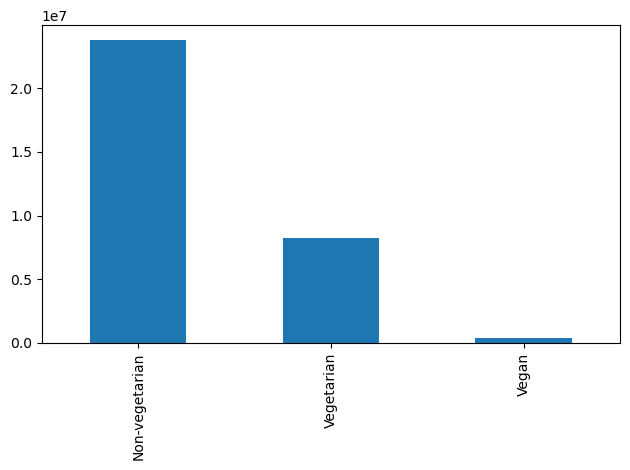

In [154]:
# Create a bar chart to visualize the diet profile

bar_diet_profile = df_combined['diet'].value_counts().plot.bar()
plt.tight_layout()

In [155]:
# Save the visualization as png

bar_diet_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_profile.png'))

**Pet Owners**

In [43]:
# Assigning pet flags and storing the values in a dictionary

pet_dict = dict()
for user in department_user_crosstab:
    workinglist = department_user_crosstab[user].tolist()
    if workinglist[7] == 0 :     
        pet_dict[user] = 'No pet'
    else:
        pet_dict[user] = 'Has pet'

# the index starts at 0, so index 0 corresponds to dep_id=1

In [44]:
# Assigning the flags to the list

pet_flag = []
for user in df_combined['user_id']:
    pet_flag.append(pet_dict[user])

In [45]:
# Adding pet_flag column to the df

df_combined['pet_status'] = pet_flag

In [46]:
# Check value counts

df_combined['pet_status'].value_counts(dropna = False)

No pet     28876718
Has pet     3528141
Name: pet_status, dtype: int64

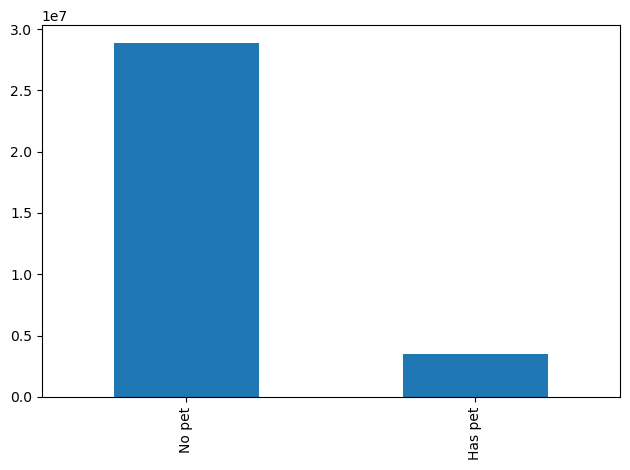

In [156]:
# Create a bar chart to visualize the pet ownership profile

bar_pet_profile = df_combined['pet_status'].value_counts().plot.bar()
plt.tight_layout()

In [157]:
# Save the visualization as png

bar_pet_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_profile.png'))

**Number of Dependants / Family Status**

In [49]:
# Distribution of the marital status of the customers

df_combined['marital_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marital_status, dtype: int64

In [50]:
#Create a crosstab between number_dependants and marital_status

family_crosstab = pd.crosstab(df_combined['marital_status'], df_combined['number_of_dependants'], dropna = False)

In [51]:
family_crosstab

number_of_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


From the above crosstab, we can see that people who are single, and divorced or widowed have no dependants. </br>
So they can be classified as customers with dpendants and customers with no dependants

In [52]:
# Family status classification

df_combined.loc[(df_combined['number_of_dependants'] == 0), 'dependants'] = 'No dependants'


In [53]:
df_combined.loc[(df_combined['number_of_dependants'] >= 1), 'dependants'] = 'Has dependants'


In [54]:
# Check the value counts

df_combined['dependants'].value_counts(dropna = False)

Has dependants    24307356
No dependants      8097503
Name: dependants, dtype: int64

In [55]:
df_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,number_of_dependants,marital_status,income,region,order_flag,age_profile,income_profile,diet,pet_status,dependants
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,3,married,40423,South,High-activity customer,Young,Low income,Vegetarian,No pet,Has dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,South,High-activity customer,Young,Low income,Vegetarian,No pet,Has dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,South,High-activity customer,Young,Low income,Vegetarian,No pet,Has dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,South,High-activity customer,Young,Low income,Vegetarian,No pet,Has dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,South,High-activity customer,Young,Low income,Vegetarian,No pet,Has dependants


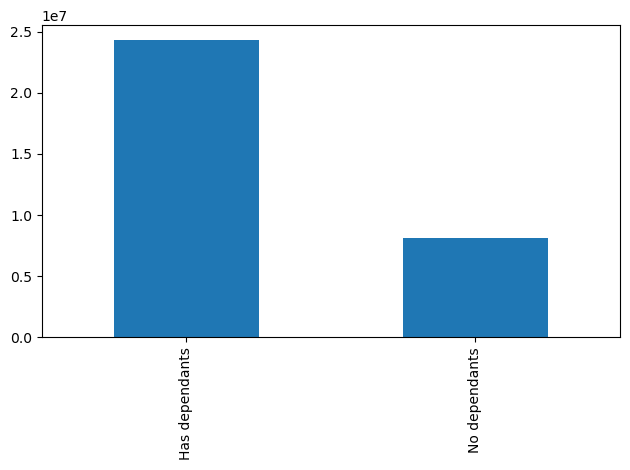

In [158]:
# Create a bar chart to visualize the dependants profile

bar_dependants_profile = df_combined['dependants'].value_counts().plot.bar()
plt.tight_layout()

In [159]:
# Save the visualization as png

bar_dependants_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants_profile.png'))

**Alcohol Consumption**

In [58]:
# Assigning alcohol flags and storing the values in a dictionary

alcohol_dict = dict()
for user in department_user_crosstab:
    workinglist = department_user_crosstab[user].tolist()
    if workinglist[4] == 0 :     
        alcohol_dict[user] = 'Does not drink'
    else:
        alcohol_dict[user] = 'Consumes alcohol'

In [59]:
# Assigning the flags to the list

alcohol_flag = []
for user in df_combined['user_id']:
    alcohol_flag.append(alcohol_dict[user])

In [60]:
# Adding pet_flag column to the df

df_combined['alcohol_consumption'] = alcohol_flag

In [61]:
# Check value counts

df_combined['alcohol_consumption'].value_counts(dropna = False)

Does not drink      29991046
Consumes alcohol     2413813
Name: alcohol_consumption, dtype: int64

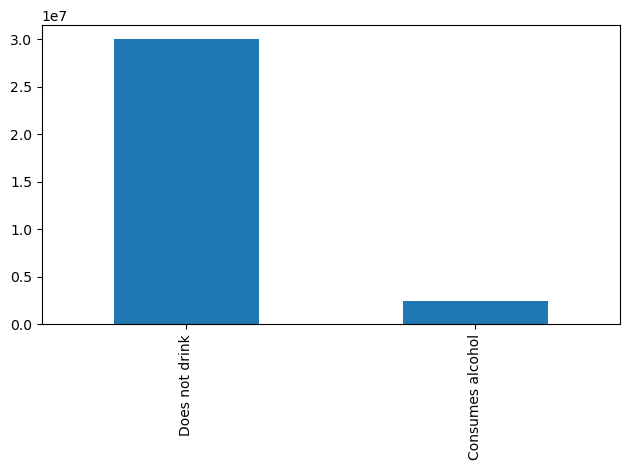

In [160]:
# Create a bar chart to visualize the alcohol profile

bar_alcohol_profile = df_combined['alcohol_consumption'].value_counts().plot.bar()
plt.tight_layout()

In [161]:
# Save the visualization as png

bar_alcohol_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_alcohol_profile.png'))

Step 7

In [64]:
df_combined.loc[df_combined['prices'] > 100, 'prices'] = np.nan

In [65]:
# Descrptive statistics for age profile

df_combined.groupby('age_profile').agg({'days_since_last_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_last_order               prices           
                             mean   max  min      mean   max  min
age_profile                                                      
Middle-aged             10.404018  30.0  0.0  7.791341  25.0  1.0
Senior                  10.367885  30.0  0.0  7.796546  25.0  1.0
Young                   10.399057  30.0  0.0  7.786553  25.0  1.0

In [66]:
# Descrptive statistics for income profile

df_combined.groupby('income_profile').agg({'days_since_last_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_last_order               prices           
                                mean   max  min      mean   max  min
income_profile                                                      
High income                10.330294  30.0  0.0  7.957172  25.0  1.0
Low income                 10.490422  30.0  0.0  7.434729  25.0  1.0
Mid income                 10.356481  30.0  0.0  7.962545  25.0  1.0

In [67]:
# Descrptive statistics for diet profile

df_combined.groupby('diet').agg({'days_since_last_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_last_order               prices           
                                mean   max  min      mean   max  min
diet                                                                
Non-vegetarian             10.151696  30.0  0.0  7.905951  25.0  1.0
Vegan                      12.898090  30.0  0.0  7.009920  20.0  1.0
Vegetarian                 10.969693  30.0  0.0  7.496501  20.0  1.0

In [68]:
# Descrptive statistics for pet ownership profile

df_combined.groupby('pet_status').agg({'days_since_last_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_last_order               prices           
                            mean   max  min      mean   max  min
pet_status                                                      
Has pet                 9.795345  30.0  0.0  7.812556  25.0  1.0
No pet                 10.465651  30.0  0.0  7.788360  25.0  1.0

In [69]:
# Descrptive statistics for family status profile

df_combined.groupby('dependants').agg({'days_since_last_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_last_order               prices           
                                mean   max  min      mean   max  min
dependants                                                          
Has dependants             10.399639  30.0  0.0  7.791334  25.0  1.0
No dependants              10.371750  30.0  0.0  7.789975  25.0  1.0

In [70]:
# Descrptive statistics for alcohol consumption profile

df_combined.groupby('alcohol_consumption').agg({'days_since_last_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_last_order               prices           
                                     mean   max  min      mean   max  min
alcohol_consumption                                                      
Consumes alcohol                10.200421  30.0  0.0  7.781196  25.0  1.0
Does not drink                  10.408143  30.0  0.0  7.791782  25.0  1.0

Step 8

**Customer profiles by Regions**

**Age**

In [71]:
# Create a crosstab to compare age profile and region

cross_age_region = pd.crosstab(df_combined['age_profile'], df_combined['region'], normalize = 'columns')

In [72]:
cross_age_region

region,Midwest,Northeast,South,West
age_profile,,,,
Middle-aged,0.380661,0.370974,0.371166,0.378535
Senior,0.262045,0.271531,0.262814,0.264573
Young,0.357294,0.357495,0.366020,0.356892


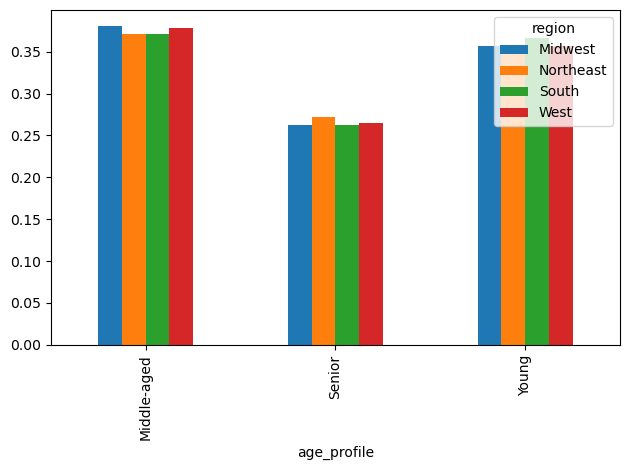

In [162]:
# Create a bar chart to visualize the relation between age profile and region

bar_age_region = cross_age_region.plot.bar()
plt.tight_layout()

In [163]:
# Save the visualization as png

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'))

**Income**

In [75]:
# Create a crosstab to compare income profile and region

cross_income_region = pd.crosstab(df_combined['income_profile'], df_combined['region'], normalize = 'columns')

In [76]:
cross_income_region

region,Midwest,Northeast,South,West
income_profile,,,,
High income,0.270318,0.268977,0.262824,0.265481
Low income,0.319571,0.318405,0.323667,0.325550
Mid income,0.410111,0.412618,0.413510,0.408968


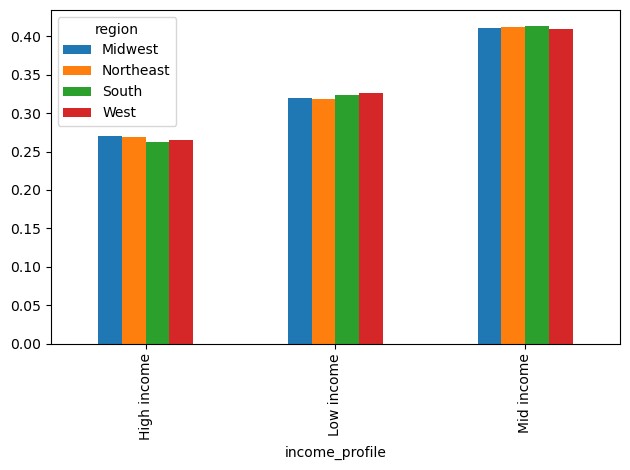

In [164]:
# Create a bar chart to visualize the relation between income profile and region

bar_income_region = cross_income_region.plot.bar()
plt.tight_layout()

In [165]:
# Save the visualization as png

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region.png'))


**Diet Preference**

In [79]:
# Create a crosstab to compare diet profile and region

cross_diet_region = pd.crosstab(df_combined['diet'], df_combined['region'], normalize = 'columns')

In [80]:
cross_diet_region

region,Midwest,Northeast,South,West
diet,,,,
Non-vegetarian,0.730808,0.734091,0.733396,0.734928
Vegan,0.011885,0.011841,0.011611,0.012066
Vegetarian,0.257307,0.254068,0.254993,0.253005


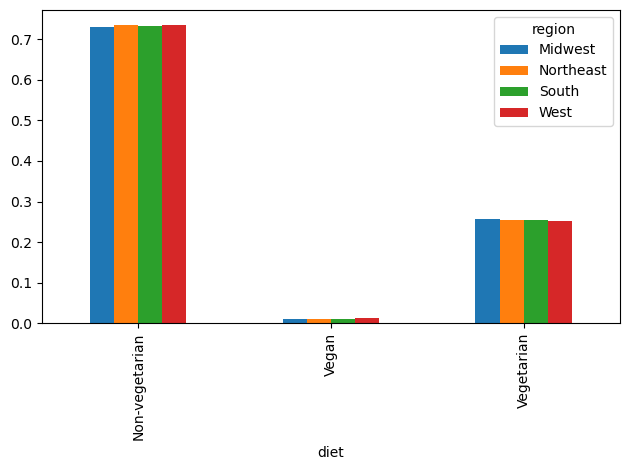

In [166]:
# Create a bar chart to visualize the relation between diet profile and region

bar_diet_region = cross_diet_region.plot.bar()
plt.tight_layout()

In [167]:
# Save the visualization as png

bar_diet_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_region.png'))

**Pet ownership**

In [83]:
# Create a crosstab to compare pet profile and region

cross_pet_region = pd.crosstab(df_combined['pet_status'], df_combined['region'], normalize = 'columns')

In [84]:
cross_pet_region

region,Midwest,Northeast,South,West
pet_status,,,,
Has pet,0.111164,0.107019,0.105796,0.112073
No pet,0.888836,0.892981,0.894204,0.887927


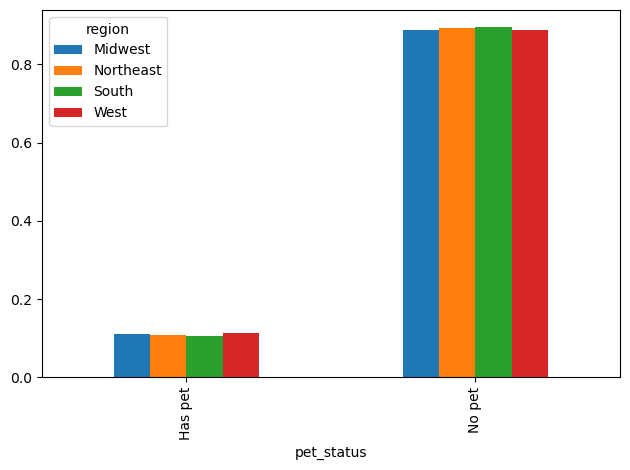

In [168]:
# Create a bar chart to visualize the relation between pet profile and region

bar_pet_region = cross_pet_region.plot.bar()
plt.tight_layout()

In [169]:
# Save the visualization as png

bar_pet_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_region.png'))

**Family status / Number of dependants**

In [87]:
# Create a crosstab to compare family profile and region

cross_dependants_region = pd.crosstab(df_combined['dependants'], df_combined['region'], normalize = 'columns')

In [88]:
cross_dependants_region

region,Midwest,Northeast,South,West
dependants,,,,
Has dependants,0.749228,0.752164,0.749658,0.750107
No dependants,0.250772,0.247836,0.250342,0.249893


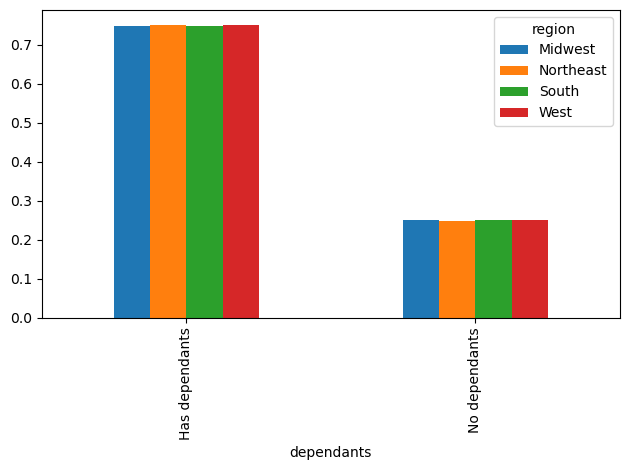

In [170]:
# Create a bar chart to visualize the relation between family profile and region

bar_dependants_region = cross_dependants_region.plot.bar()
plt.tight_layout()

In [171]:
# Save the visualization as png

bar_dependants_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants_region.png'))

**Alcohol consumption**

In [91]:
# Create a crosstab to compare alcohol profile and region

cross_alcohol_region = pd.crosstab(df_combined['alcohol_consumption'], df_combined['region'], normalize = 'columns')

In [92]:
cross_alcohol_region

region,Midwest,Northeast,South,West
alcohol_consumption,,,,
Consumes alcohol,0.074512,0.071097,0.075312,0.075738
Does not drink,0.925488,0.928903,0.924688,0.924262


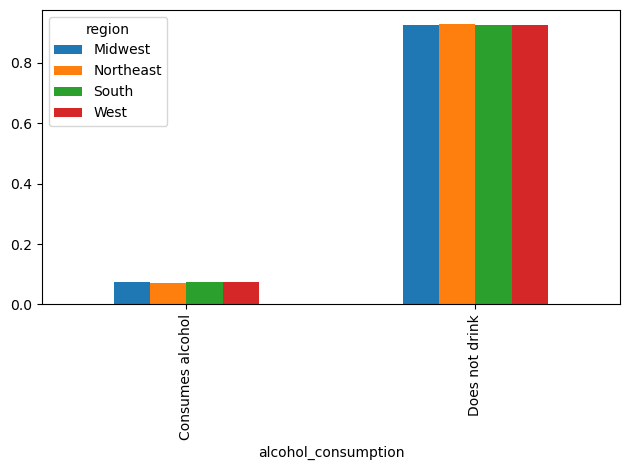

In [172]:
# Create a bar chart to visualize the relation between alcohol profile and region

bar_alcohol_region = cross_alcohol_region.plot.bar()
plt.tight_layout()

In [173]:
# Save the visualization as png

bar_alcohol_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_alcohol_region.png'))

In [95]:
# Import department.csv

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [96]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [97]:
# Rename Unamed as department_id

df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [98]:
dept_dict = dict(zip(df_dep["department_id"], df_dep["department"]))

In [99]:
dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [100]:
# Create a column to add the department name to df

df_combined['department'] = df_combined['department_id'].map(dept_dict)

**Customer profiles by Departments**

**Age**

In [101]:
# Create a crosstab to compare age profile and department id
# Normalizing the index to get row percentages

cross_age_department =  pd.crosstab(index = df_combined['department'], 
                                         columns = df_combined['age_profile'], 
                                         normalize = 'index')

cross_age_department

In [102]:
# Display all columns

pd.set_option('display.max_columns', None)   

In [103]:
cross_age_department

age_profile,Middle-aged,Senior,Young
department,,,
alcohol,0.373575,0.253982,0.372443
babies,0.381296,0.258246,0.360458
bakery,0.376538,0.264001,0.359461
beverages,0.377972,0.265922,0.356106
breakfast,0.377487,0.261501,0.361012
bulk,0.370896,0.267318,0.361785
canned goods,0.373947,0.264441,0.361612
dairy eggs,0.374146,0.264175,0.361680
deli,0.376060,0.264084,0.359856


In [104]:
# Create a new crosstab to display department_id on x-axis

cross_department_age = pd.crosstab(index = df_combined['department'],
                                   columns = df_combined['age_profile'])

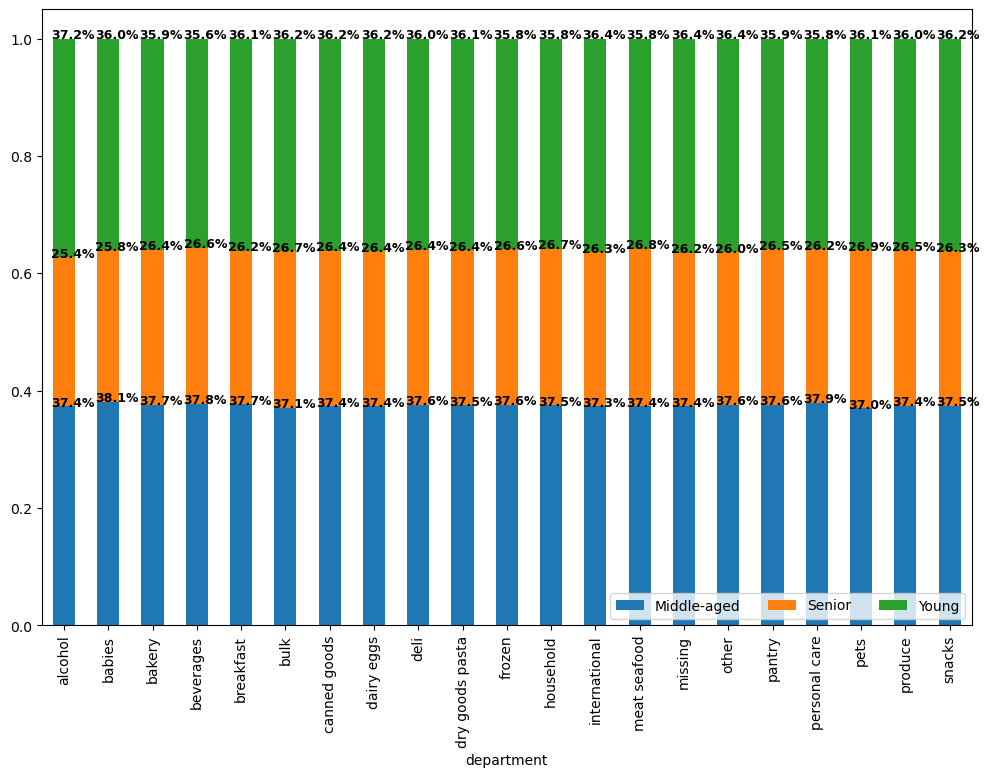

<Figure size 640x480 with 0 Axes>

In [200]:
#Create a bar chart to visualize the relation between age profile and departments

bar_age_department = cross_age_department.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*cross_department_age.index.values]):
    for (proportion, y_loc) in zip(cross_age_department.loc[x],
                                   cross_age_department.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [201]:
# Save the visualization as png

bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_department.png'))

**Income**

In [107]:
# Create a crosstab to compare income profile and department id
# Normalizing the index to get row percentages

cross_income_department =  pd.crosstab(index = df_combined['department'], 
                                         columns = df_combined['income_profile'], 
                                         normalize = 'index')

In [108]:
cross_department_income = pd.crosstab(index = df_combined['department'],
                                   columns = df_combined['income_profile'])

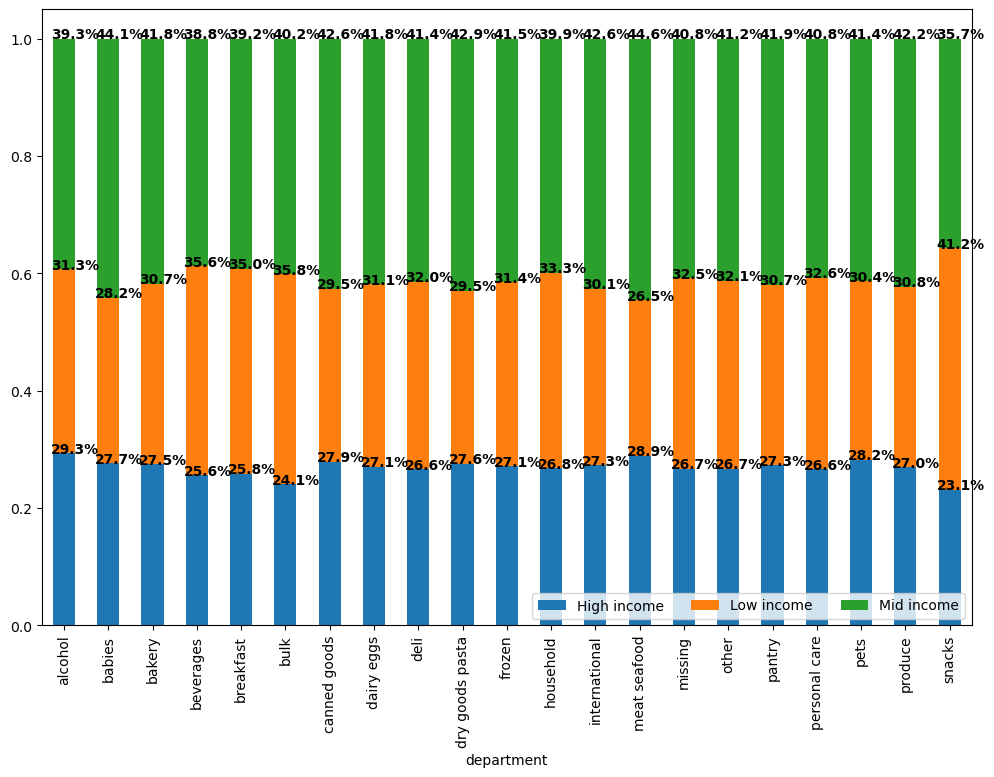

<Figure size 640x480 with 0 Axes>

In [202]:
#Create a bar chart to visualize the relation between income profile and departments

bar_income_department = cross_income_department.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*cross_department_income.index.values]):
    for (proportion, y_loc) in zip(cross_income_department.loc[x],
                                   cross_income_department.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [203]:
# Save the visualization as png

bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_department.png'))

**Diet Preferences**

In [111]:
# Create a crosstab to compare diet profile and department id
# Normalizing the index to get row percentages

cross_diet_department =  pd.crosstab(index = df_combined['department'], 
                                         columns = df_combined['diet'], 
                                         normalize = 'index')

In [112]:
cross_department_diet = pd.crosstab(index = df_combined['department'],
                                   columns = df_combined['diet'])

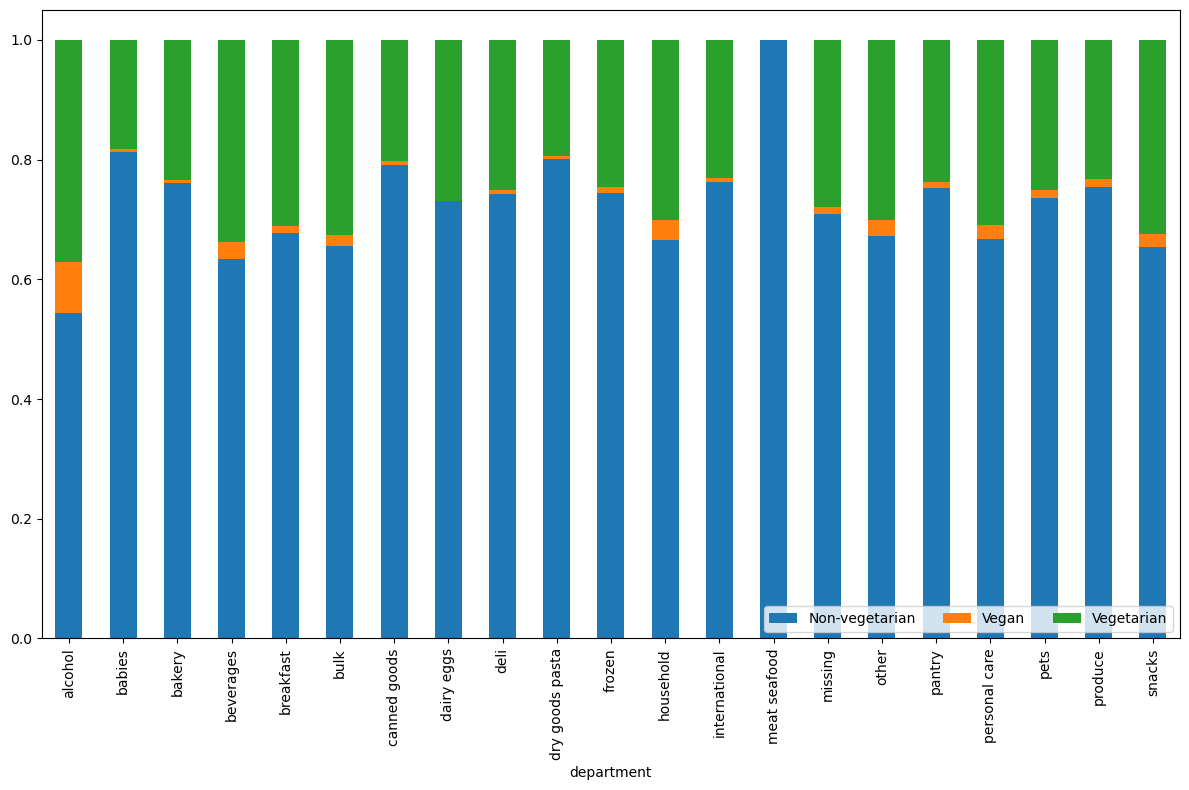

In [204]:
#Create a bar chart to visualize the relation between diet profile and departments

bar_diet_department = cross_diet_department.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
plt.tight_layout()
#for n, x in enumerate([*cross_department_diet.index.values]):
 #   for (proportion, y_loc) in zip(cross_diet_department.loc[x],
  #                                 cross_diet_department.loc[x].cumsum()):
   # 
    #    plt.text(x= n -0.30,
     #            y= y_loc,
      #           s= f'{np.round(proportion * 100, 1)}%',
       #          color ='black',
        #         fontsize = 8,
         #        fontweight = 'bold')

#plt.show()

In [205]:
# Save the visualization as png

bar_diet_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_department.png'))

**Pet Status**

In [115]:
# Create a crosstab to compare pet profile and department id
# Normalizing the index to get row percentages

cross_pet_department =  pd.crosstab(index = df_combined['department'], 
                                         columns = df_combined['pet_status'], 
                                         normalize = 'index')

In [116]:
cross_department_pet = pd.crosstab(index = df_combined['department'],
                                   columns = df_combined['pet_status'])

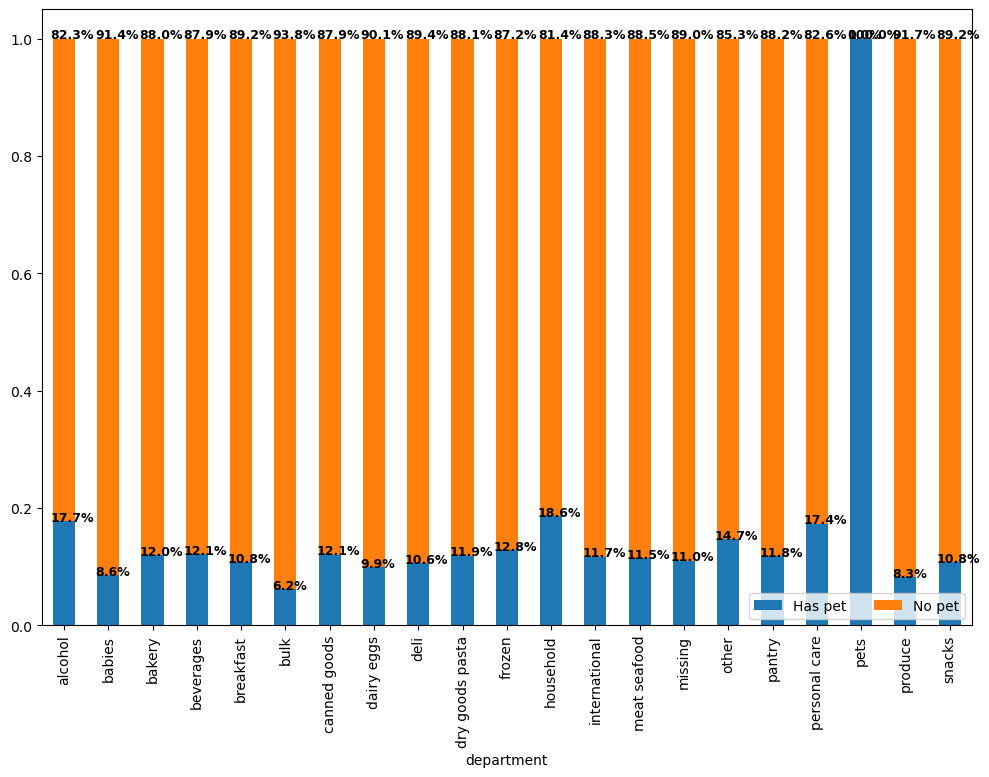

<Figure size 640x480 with 0 Axes>

In [206]:
#Create a bar chart to visualize the relation between pet profile and departments

bar_pet_department = cross_pet_department.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*cross_department_pet.index.values]):
    for (proportion, y_loc) in zip(cross_pet_department.loc[x],
                                   cross_pet_department.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [207]:
# Save the visualization as png

bar_pet_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_department.png'))

**Alcohol Consumption**

In [119]:
# Create a crosstab to compare alcohol profile and department id
# Normalizing the index to get row percentages

cross_alcohol_department =  pd.crosstab(index = df_combined['department'], 
                                         columns = df_combined['alcohol_consumption'], 
                                         normalize = 'index')

In [120]:
cross_department_alcohol = pd.crosstab(index = df_combined['department'],
                                   columns = df_combined['alcohol_consumption'])

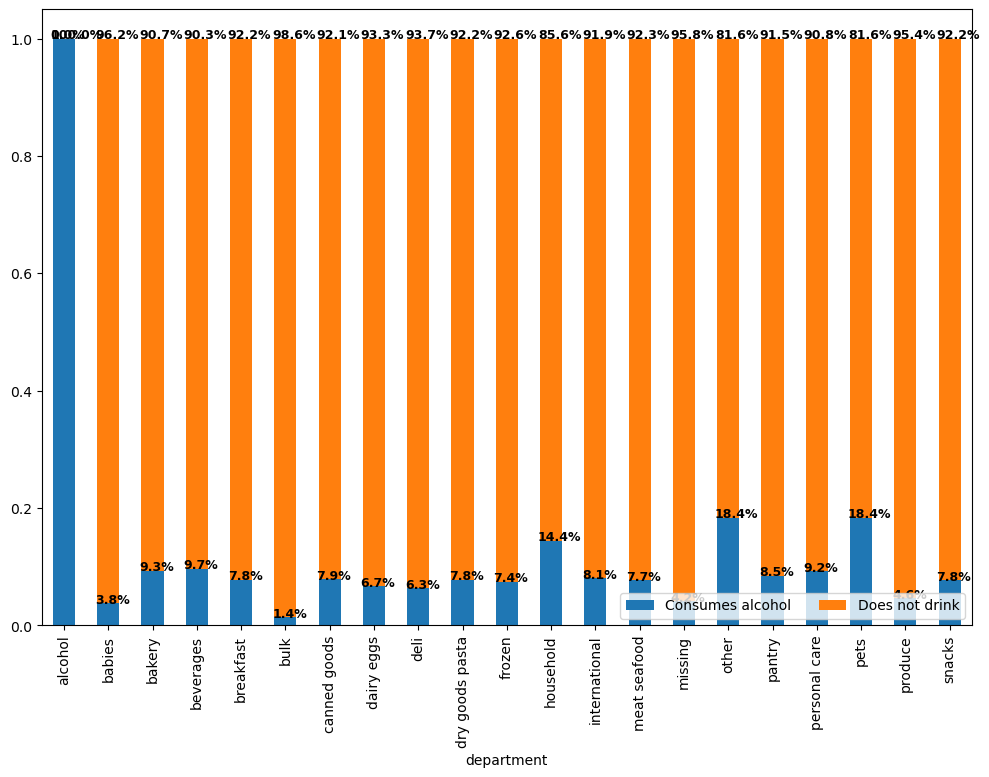

<Figure size 640x480 with 0 Axes>

In [208]:
#Create a bar chart to visualize the relation between alcohol profile and departments

bar_alcohol_department = cross_alcohol_department.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*cross_department_alcohol.index.values]):
    for (proportion, y_loc) in zip(cross_alcohol_department.loc[x],
                                   cross_alcohol_department.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [209]:
# Save the visualization as png

bar_alcohol_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_alcohol_department.png'))

**Family status / Dependants**

In [123]:
# Create a crosstab to compare dependants profile and department id
# Normalizing the index to get row percentages

cross_dependants_department =  pd.crosstab(index = df_combined['department'], 
                                         columns = df_combined['dependants'], 
                                         normalize = 'index')

In [124]:
cross_department_dependants = pd.crosstab(index = df_combined['department'],
                                   columns = df_combined['dependants'])

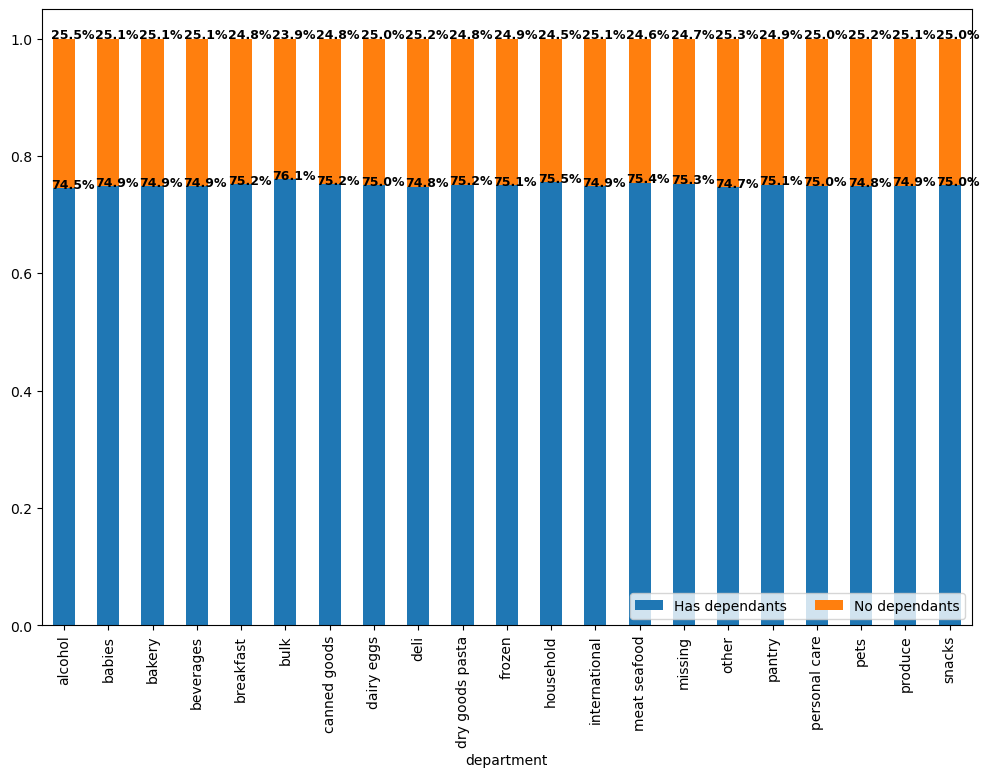

<Figure size 640x480 with 0 Axes>

In [210]:
#Create a bar chart to visualize the relation between dependants profile and departments

bar_dependants_department = cross_dependants_department.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*cross_department_dependants.index.values]):
    for (proportion, y_loc) in zip(cross_dependants_department.loc[x],
                                   cross_dependants_department.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [211]:
# Save the visualization as png

bar_dependants_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants_department.png'))

**Further analysis to answer other business questions**

In [127]:
# Are there differences in ordering habits based on a customer's loyalty status?

cross_loyalty_department =  pd.crosstab(index = df_combined['department'], 
                                         columns = df_combined['loyalty_flag'], 
                                         normalize = 'index')

In [128]:
cross_department_loyalty = pd.crosstab(index = df_combined['department'],
                                   columns = df_combined['loyalty_flag'])

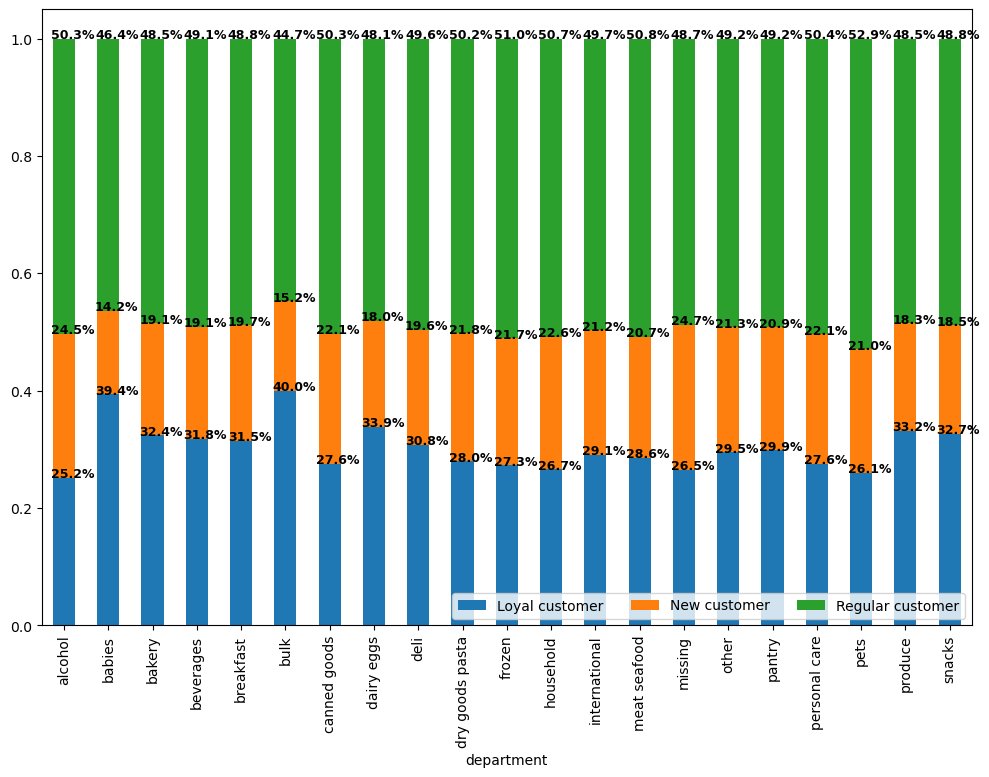

<Figure size 640x480 with 0 Axes>

In [192]:
#Create a bar chart to visualize the relation between loyalty and departments

bar_loyalty_department = cross_loyalty_department.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*cross_department_loyalty.index.values]):
    for (proportion, y_loc) in zip(cross_loyalty_department.loc[x],
                                   cross_loyalty_department.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [193]:
# Save the visualization as png

bar_loyalty_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_department.png'))

In [131]:
# Are there differences in ordering habits based on a customer’s region?

cross_region_department =  pd.crosstab(index = df_combined['department'], 
                                         columns = df_combined['region'], 
                                         normalize = 'index')

In [132]:
cross_department_region = pd.crosstab(index = df_combined['department'],
                                   columns = df_combined['region'])

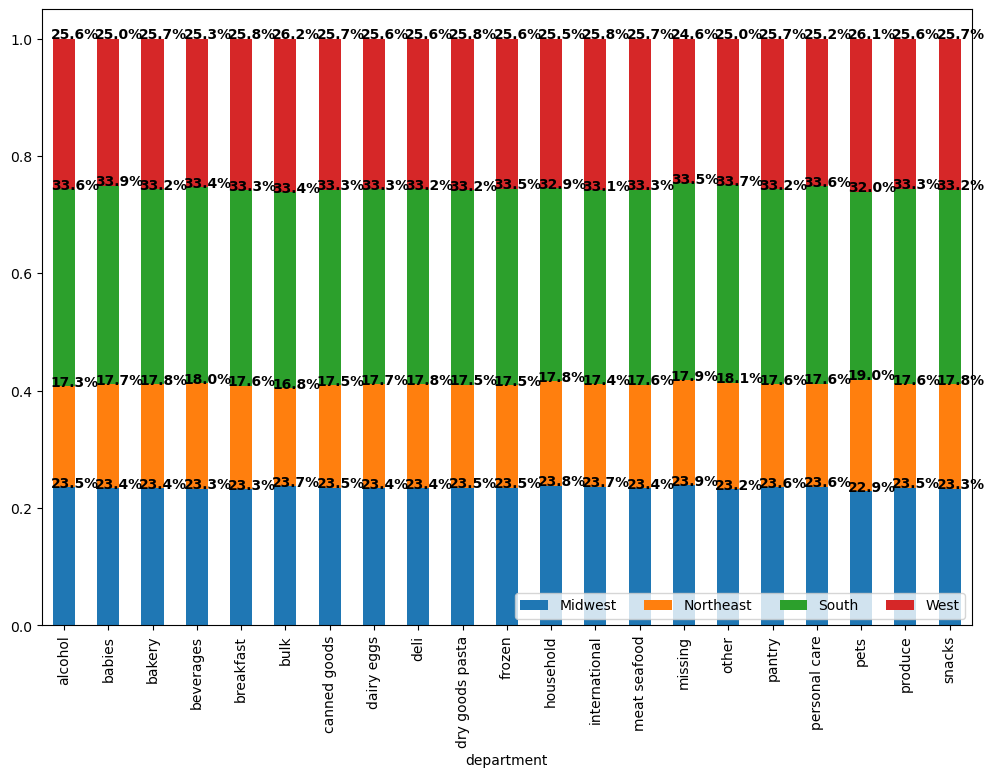

<Figure size 640x480 with 0 Axes>

In [198]:
#Create a bar chart to visualize the relation between regions and departments

bar_region_department = cross_region_department.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*cross_department_region.index.values]):
    for (proportion, y_loc) in zip(cross_region_department.loc[x],
                                   cross_region_department.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [199]:
# Save the visualization as png

bar_region_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_department.png'))

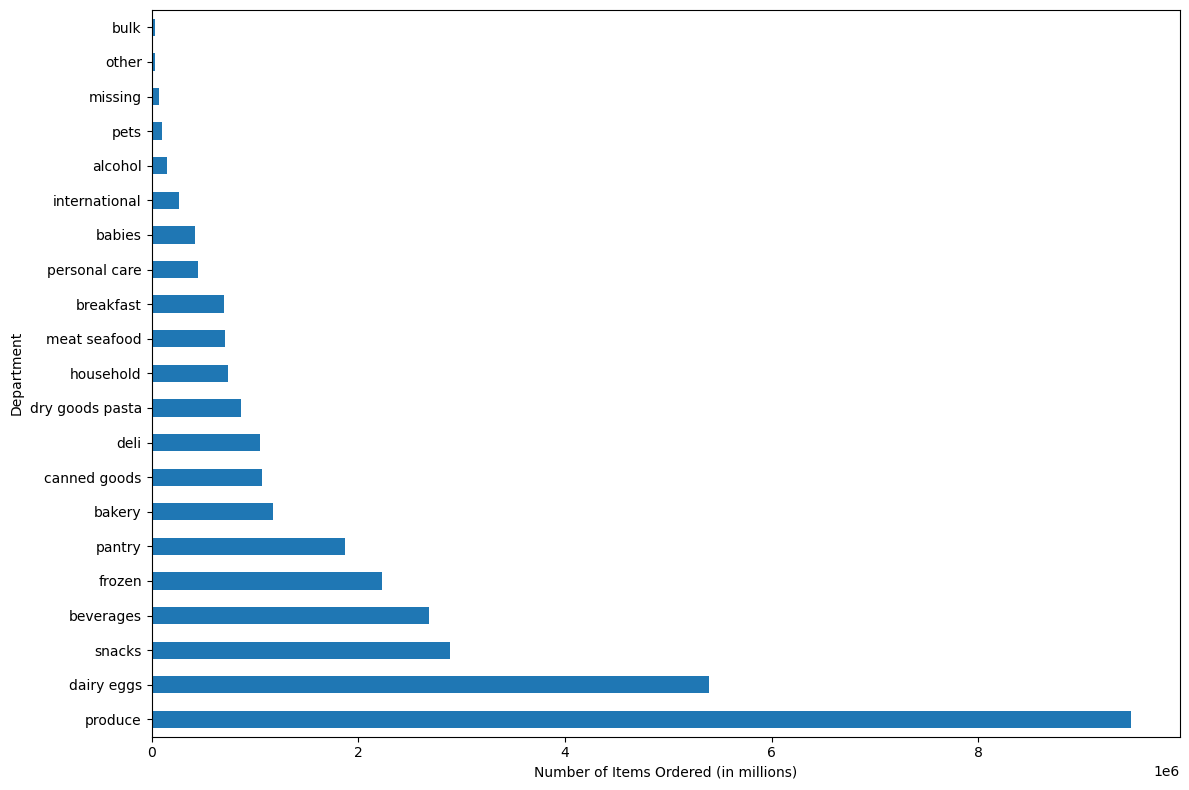

In [196]:
# Are there certain types of products that are more popular than others?

bar_department = df_combined['department'].value_counts().plot.barh(figsize = (12,8))
plt.xlabel('Number of Items Ordered (in millions)')
plt.ylabel('Department')
plt.tight_layout()

In [197]:
# Save the visualization as png

bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department.png'))

In [137]:
# Export the final data

df_combined.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final.pkl'))

In [139]:
# Created a sample of the dataframe, to dispaly the price range of products
df = df_combined[:5000]

In [141]:
df.price_range_loc = df.price_range_loc.fillna('High-range product')


C:\Users\guest23455\AppData\Local\Temp\ipykernel_23172\3370048112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price_range_loc = df.price_range_loc.fillna('High-range product')


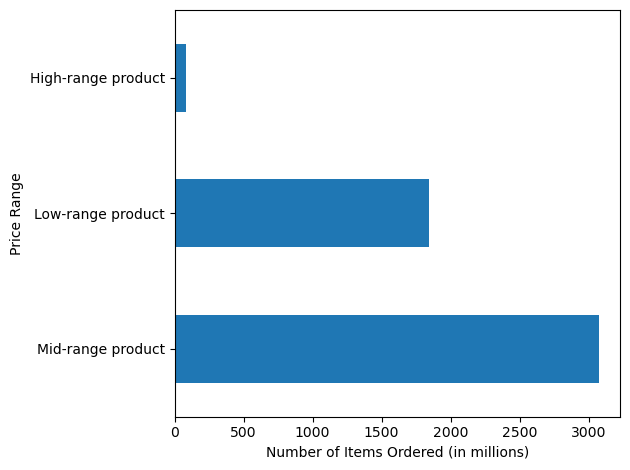

In [142]:
# Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts

bar_range = df['price_range_loc'].value_counts().plot.barh()
plt.xlabel('Number of Items Ordered (in millions)')
plt.ylabel('Price Range')
plt.tight_layout()

In [143]:
# Save the visualization as png

bar_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_range.png'))